# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand how Eigen faces can be used to represent the images

## Dataset

### Description 

The dataset choosen for this experiment is 10 celebrity faces dataset. The dataset contains 20 images for each celebrity.  

The celebrity includes : 

* Aamir Khan
* Madhuri_Dixit
* Kamal Hassan
* Virat Kohli
* Amitabh Bachchan
* Mahendra Singh Dhoni
* A.P.J. Abdul Kalam
* Preity Zinta
* A.R. Rahman
* Vidya Balan

## AI / ML Technique

### Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

Eigenfaces are images that can be added to a mean (average) face to create new facial images. We can write this mathematically as,

 
>$ F=F_m+\sum_{i=0}^n F_{i} \alpha $



where,

F is a new face.
F_m is the mean or the average face,
F_i is an EigenFace,
$\alpha_i$ are scalar multipliers we can choose to create new faces. They can be positive or negative


 ![Alt text](https://www.learnopencv.com/wp-content/uploads/2018/01/EigenFace.jpg).
 
  **Description of the image above:** On the left is the mean image. On the right is a new face produced by adding 10 Eigenfaces with different weights (shown in center).
  
  Eigenfaces are calculated by estimating the principal components of the dataset of facial images. They are used for applications like Face Recognition and Facial Landmark Detection.
  


#### Importing Required Packages

In [0]:
from scipy.misc import *
from scipy import linalg
import imageio
import glob
import numpy
import os
import pdb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Function to load the images from the directory

In [0]:
def load_images(directory):
    # get a list of all the picture filenames
    jpgs = glob.glob(directory + '/*')
    #The line below might look long winded, but it basically trying to extract the name (say) Mahendra_Singh_Dhoni from a 
    #..path such as './faces/Mahendra_Singh_Dhoni_20.jpg' and then mapping this to unique id (such as 1)
    label_dict = {label:index for index, label in enumerate(numpy.unique([''.join(i.split('/')[-1].split('.')[0].split('_')[:-1]) for i in jpgs]))}
    #We use now the same logic as above, but this time to fetch the 'id' corresponding to the label in the dictionary created above
    labels = [label_dict[''.join(i.split('/')[-1].split('.')[0].split('_')[:-1])] for i in jpgs]
    # load a greyscale version of each image
    imgs = numpy.array([imresize(imread(i, True), (224, 224)).flatten() for i in jpgs])
    print(imgs.shape)
    return imgs, labels

#### Function to Calculate the eigen faces, weights for each image and mean

NOTE: We use SVD (Singular Value Decomposition) here to get our Eigen vector. It is important to note that another popular method of gettign the Eigen vectors is through PCA (Principal Component Analysis), where we perform 'Eigen Decomposition' over the co-variance matrix (which is constructed by multiplying the dataset with its own transpose after adjusting the mean). Please note however that most machine learning libraries help us find the Principal Components (Eigen vectors) simply through a function call (by using either methods mentioned)and hence it is important to focus on the idea of Principal components itself and how its useful for the ML model (as opposed to understanding the mathematics behind the same, especially if time is a premium) 

In [0]:
def pca(data):
    mu = numpy.mean(data, 0)
    # mean adjust(ma) the data
    ma_data = data - mu
    # run SVD. The e_faces variable below is what is the Eigen Vectors (also called as Eigen Basis)
    e_faces, sigma, v = linalg.svd(ma_data.transpose(), full_matrices=False)
    # we project the mean adjusted data onto these new Eigen Vectors (or Eigen Basis) to get a weight in each of those directions
    weights = numpy.dot(ma_data, e_faces)
    return e_faces, weights, mu, v

#### Function to reconstruct the image . In this function we will be performing the dot product between weights and eigen face then adding the mean value.

In [0]:
def reconstruct(img_idx, e_faces, weights, mu, npcs):
    # dot weights with the eigenfaces and add to. This should reconstruct the image back.
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

#### Function to save the image into a directory named "image"

In [0]:
def save_image(out_dir, subdir, img_id, img_dims, data):
    directory = out_dir + "/" + subdir
    if not os.path.exists(directory): os.makedirs(directory)
    imsave(directory + "/image_" + str(img_id) + ".jpg", data.reshape(img_dims))

#### Loading the new set of images

In [0]:
dir = "./faces"

In [0]:
data, labels = load_images(dir)

(200, 50176)


In [0]:
len(labels)

200

In [0]:
data.shape

(200, 50176)

#### Calling the PCA function and storing the eigen faces, weights and mean values

In [0]:
img_dims = (224,224)

In [0]:
e_faces, weights, mu,v = pca(data)

Plot of data in 2D in Eigen space

In [0]:
v.shape, v[0]

((200, 200),
 array([ 0.01382075, -0.04365567, -0.09456834, -0.03350027,  0.06357772,
         0.01089987,  0.12940194,  0.04320893, -0.0292772 ,  0.10211286,
         0.10288266, -0.13758993, -0.08468246,  0.08654783,  0.03197294,
         0.0239555 ,  0.0138656 , -0.09307441, -0.11146408,  0.08846302,
         0.01377249,  0.00618461,  0.02216725,  0.08548957,  0.1533919 ,
        -0.06626056, -0.037132  , -0.08480801,  0.05942275,  0.08894683,
         0.07875822, -0.07595337,  0.03055553, -0.00875081, -0.05410283,
         0.05561727, -0.10896947,  0.02115683, -0.04246112, -0.00109586,
         0.01242948, -0.08831343,  0.04739917, -0.00698926, -0.0330265 ,
        -0.05401027,  0.05919612,  0.05732321, -0.05512192,  0.02314836,
        -0.07112118, -0.01043523,  0.00018818, -0.10680917, -0.09760601,
        -0.0146258 ,  0.12678545, -0.04307647, -0.10570546, -0.02215879,
         0.08637605, -0.03148852,  0.10818303, -0.01228655,  0.04304238,
        -0.10495119, -0.02086946, -0.0

In [0]:
weights.shape

(200, 200)

In [0]:
e_faces.shape

(50176, 200)

### We merely show here below about how the 'weights' (unique to each image) is a feature that is good to be used for classification purposes as well (the scope of this experiment is however not classification using Eigen faces)

In [0]:
X_train, y_train = weights, labels

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [0]:
pred_labels = clf.predict(X_train)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_train, pred_labels, normalize=True)

1.0

In [0]:
confusion_matrix(pred_labels, y_train)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

## Now we plot Eigen Faces(weights) on a simple 2D plot

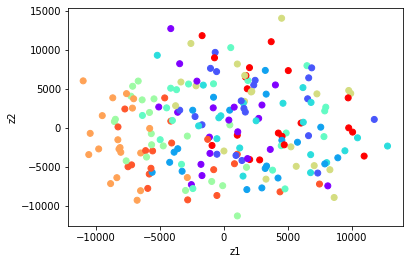

In [0]:
plt.scatter(weights[:, 0], weights[:, 1], c=labels, cmap='rainbow')
plt.xlabel('z1')
plt.ylabel('z2')
plt.savefig('Faces_in_2d.png')

### Eigen Value Spectrum (Note: we're using SVD here below to get the Eigen Values and Eigen Vectors). 

In [0]:
mu = numpy.mean(data, 0)
# mean adjust the data
ma_data = data - mu
Eigen_values, Eigen_vectors = numpy.linalg.eig(ma_data@ma_data.T)

In [0]:
Eigen_values.shape,Eigen_vectors.shape

((200,), (200, 200))

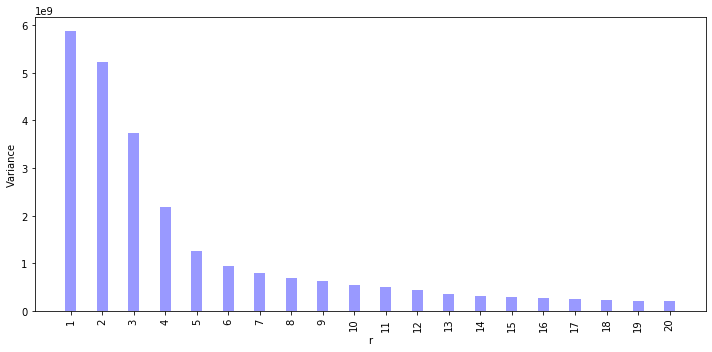

In [0]:
%matplotlib inline  

fig = plt.figure()
fig.set_size_inches(10,5)
index = numpy.arange(len(Eigen_values[:20]))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index , Eigen_values[:20], bar_width,
                 alpha=opacity,
                 color='b',
                 #yerr=std_e1,
                 #error_kw=error_config,
                 label='Eigen value Spectrum')
plt.xticks(index, numpy.arange(Eigen_values.shape[0])+1,  rotation=90)
plt.xlabel('r')
plt.ylabel('Variance')
#plt.legend()

plt.tight_layout()
plt.savefig('Eigen_values_spectrum.png')
plt.show()

In [0]:
e_faces.shape

(50176, 200)

#### Saving the mean image in output directory and displaying it

In [0]:
imsave("output_new" + "/mean.jpg", mu.reshape(img_dims))

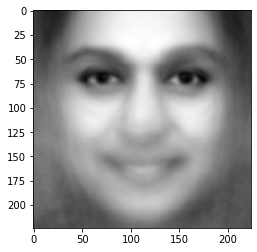

In [0]:
plt.grid(False)
plt.imshow(mu.reshape(224, 224), cmap='gray')

#### Storing the eigen faces as images in directory named "output_new" and display them here

In [0]:
for i in range(e_faces.shape[1]):
    #continue
    save_image("output_new", "eigenfaces", i, img_dims, e_faces[:,i])

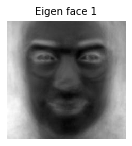

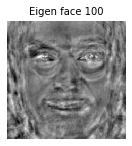

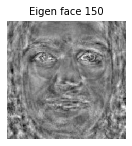

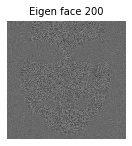

In [0]:
index = [0,99,149, 199]

for j, i in enumerate(index) :
    eigenface = "output_new/eigenfaces/image_"+str(i)+".jpg"
    title = "Eigen face " + str(i+1)
    plt.figure(figsize=(10,10))
    plt.subplot(len(index), j+1,1 )
    plt.axis('off')
    plt.imshow(imread(eigenface, True), cmap='gray')
    plt.title(title, size=10)
    plt.show()

#### Checking the shape of a eigen face

In [0]:
e_faces[:, :].shape

(50176, 200)

### Select the number of principal components for reconstruction

In [0]:
no_of_principal_components = 19

In [0]:
img_id = 50

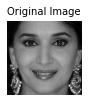

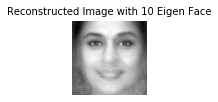

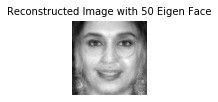

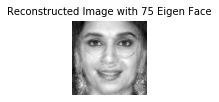

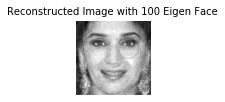

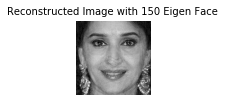

In [0]:
title = "Original Image" 
plt.figure(figsize=(3,3))
plt.subplot(2, 1,1)
plt.axis('off')
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=10)
#print(weights[img_id])
Normalised_weights = (weights[img_id]-numpy.mean(weights[img_id]))/numpy.std(weights[img_id])
#print(Normalised_weights)
for i in [9, 49,74,99,149]:
    img = reconstruct(img_id, e_faces, weights, mu, i)# To understand what this function does, please read the function description
    
    img_dims = (224,224)
    path = 'output_new/recon'
    imsave(path+"/recon"+str(i+1)+".jpg", img.reshape(img_dims))
    title = "Reconstructed Image with {} Eigen Face".format(i+1) 
    plt.figure(figsize=(3,3))
    plt.subplot(2, 1,1)
    plt.axis('off')
    plt.imshow(img.reshape(224,224), cmap='gray')
    plt.title(title, size=10)
    plt.show()

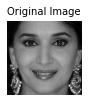

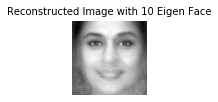

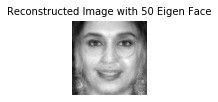

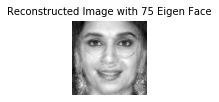

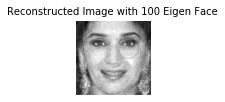

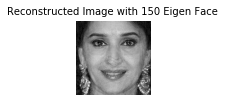

In [0]:
# test re-construct with out mean

def recon_wo_mean(img_idx, e_faces, weights, npcs):
    # dot weights with the eigenfaces and add to. This should reconstruct the image back.
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

title = "Original Image" 
plt.figure(figsize=(3,3))
plt.subplot(2, 1,1)
plt.axis('off')
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=10)
#print(weights[img_id])
Normalised_weights = (weights[img_id]-numpy.mean(weights[img_id]))/numpy.std(weights[img_id])
#print(Normalised_weights)
for i in [9, 49,74,99,149]:
    img = recon_wo_mean(img_id, e_faces, weights, i)# To understand what this function does, please read the function description
    
    img_dims = (224,224)
    path = 'output_new/recon'
    imsave(path+"/recon"+str(i+1)+".jpg", img.reshape(img_dims))
    title = "Reconstructed Image with {} Eigen Face".format(i+1) 
    plt.figure(figsize=(3,3))
    plt.subplot(2, 1,1)
    plt.axis('off')
    plt.imshow(img.reshape(224,224), cmap='gray')
    plt.title(title, size=10)
    plt.show()

In [0]:
# question
# Able to reconstruct the image without mean, so does that mean mean data can be ignore during reconstruction?